### 비트코인 시계열 예제

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mp

%matplotlib inline

In [22]:
bitcoin_df = pd.read_csv("market-price.csv", names = ['day', 'price'])
bitcoin_df

,day,price
0,2017-08-27 00:00:00,4354.308333
1,2017-08-28 00:00:00,4391.673517
2,2017-08-29 00:00:00,4607.985450
3,2017-08-30 00:00:00,4594.987850
4,2017-08-31 00:00:00,4748.255000
...,...,...
360,2018-08-22 00:00:00,6575.229167
361,2018-08-23 00:00:00,6434.881667
362,2018-08-24 00:00:00,6543.645714
363,2018-08-25 00:00:00,6719.429231


In [5]:
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])
bitcoin_df

,day,price
0,2017-08-27,4354.308333
1,2017-08-28,4391.673517
2,2017-08-29,4607.985450
3,2017-08-30,4594.987850
4,2017-08-31,4748.255000
...,...,...
360,2018-08-22,6575.229167
361,2018-08-23,6434.881667
362,2018-08-24,6543.645714
363,2018-08-25,6719.429231


In [52]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     365 non-null    object 
 1   price   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [10]:
bitcoin_df.index = bitcoin_df['day']
bitcoin_df.set_index('day', inplace = True)

In [11]:
bitcoin_df

,price
day,
2017-08-27,4354.308333
2017-08-28,4391.673517
2017-08-29,4607.985450
2017-08-30,4594.987850
2017-08-31,4748.255000
...,...
2018-08-22,6575.229167
2018-08-23,6434.881667
2018-08-24,6543.645714


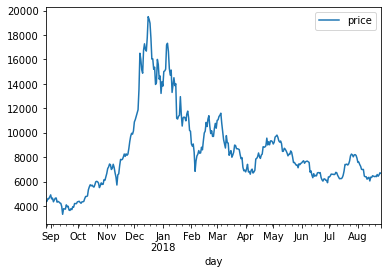

In [15]:
bitcoin_df.plot()
plt.show()

# 데이터 나눠서 시계열 적용해보기

In [68]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

## 데이터 로드 및 전처리

In [69]:
bitcoin_test_df = pd.read_csv('market-price_210704.csv', names=['ds', 'y'])
bitcoin_test_df = bitcoin_test_df.drop(0)
bitcoin_test_df['ds'] = pd.to_datetime(bitcoin_test_df['ds'])
bitcoin_test_df

,ds,y
1,2020-07-04,9072.42
2,2020-07-05,9131.31
3,2020-07-06,9089.09
4,2020-07-07,9348.91
5,2020-07-08,9256.23
...,...,...
362,2021-06-30,35847.7
363,2021-07-01,35047.36
364,2021-07-02,33536.88
365,2021-07-03,33856.86


In [70]:
bitcoin_test_df.index = bitcoin_test_df['ds']
bitcoin_test_df.set_index('ds', inplace=True)
bitcoin_test_df

,y
ds,
2020-07-04,9072.42
2020-07-05,9131.31
2020-07-06,9089.09
2020-07-07,9348.91
2020-07-08,9256.23
...,...
2021-06-30,35847.7
2021-07-01,35047.36
2021-07-02,33536.88


In [71]:
bitcoin_test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2020-07-04 to 2021-07-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   y       366 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


### plot을 그리기 위해 numeric 값으로 변경

In [72]:
bitcoin_test_df['y'] = pd.to_numeric(bitcoin_test_df['y'])

<AxesSubplot:xlabel='ds'>

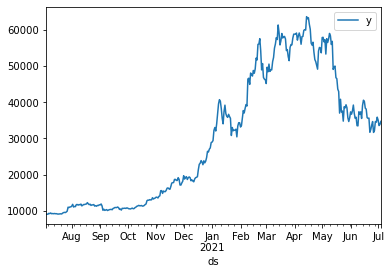

In [73]:
bitcoin_test_df.plot()

## 데이터를 나눠서 예측해보자. 마지막 5개일 데이터를 target이라고 하자.

In [74]:
# 데이터를 나눠서 예측해보자. 마지막 5개일 데이터를 target이라고 하자.
bitcoin_test_df_train = bitcoin_test_df.iloc[:-5, :]
target = bitcoin_test_df.iloc[-5:,:]

print(bitcoin_test_df_train)
print('\n\n-------------------------------------------')
print(target)

                   y
ds                  
2020-07-04   9072.42
2020-07-05   9131.31
2020-07-06   9089.09
2020-07-07   9348.91
2020-07-08   9256.23
...              ...
2021-06-25  34639.38
2021-06-26  31640.58
2021-06-27  32160.91
2021-06-28  34644.45
2021-06-29  34456.67

[361 rows x 1 columns]


-------------------------------------------
                   y
ds                  
2021-06-30  35847.70
2021-07-01  35047.36
2021-07-02  33536.88
2021-07-03  33856.86
2021-07-04  34688.98


## ARIMA 모델 fit

In [75]:
# 가격 데이터로 ARIMA 모델을 학습시킨다.
# (AR=2, 차분=1, MA=2) 의 파라미터를 적용시킨다.
model = ARIMA(bitcoin_test_df_train.y.values, order = (2,1,2))

# 
model_fit = model.fit(trend='c', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  360
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3153.663
Method:                       css-mle   S.D. of innovations           1542.530
Date:                Sun, 04 Jul 2021   AIC                           6319.327
Time:                        16:21:48   BIC                           6342.643
Sample:                             1   HQIC                          6328.598
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.5139     87.189      0.809      0.419    -100.373     241.401
ar.L1.D.y      0.6232      0.623      1.000      0.317      -0.598       1.844
ar.L2.D.y     -0.1531      0.722     -0.212      0.8

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

## train data로 학습시킨 모델을 사용해 5일 후 데이터를 예측한다

0번 array : 예측값  
1번 array : 표준오차  
2번 array : CI  

In [76]:
forecast_data = model_fit.forecast(steps = 5)
forecast_data

(array([34633.89620835, 34854.59261203, 35002.3525731 , 35098.00436482,
        35172.35381268]),
 array([1542.53036317, 2070.96927343, 2558.59115219, 3018.88501528,
        3438.44656479]),
 array([[31610.59225148, 37657.20016521],
        [30795.56742303, 38913.61780104],
        [29987.60606364, 40017.09908256],
        [29181.0984614 , 41014.91026824],
        [28433.12238293, 41911.58524243]]))

In [77]:
pred_y = forecast_data[0]
test_y = target.y.values
pred_y_lower = []
pred_y_upper = []

# CI 값을 각 lower, upper 리스트에 넣어준다.
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)


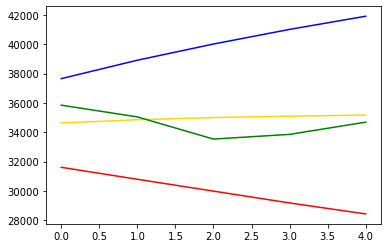

In [78]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

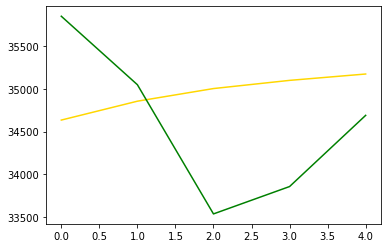

In [79]:
plt.plot(pred_y, color="gold")
plt.plot(test_y, color="green")

전체적으로 크기 빗나가지는 않았지만  
자세하게 살펴보면 가격 변동 모양이 많이 다르다.  
차이도 최대 2000 달러 가까이 났다.

# 페이스북 시계열 라이브러리로 적용해보기

## 데이터 불러오기

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mp

%matplotlib inline

from fbprophet import Prophet

In [118]:
# prophet을 사용하기 위해서는 다음과 같이 피처의 이름을 변경해야 합니다 : 'ds', 'y'

# csv 불러오기
bitcoin_df = pd.read_csv("market-price_210704.csv", names=['ds', 'y'])

# 필요없는 0행 지움. dtype도 바꿔줌.
bitcoin_df = bitcoin_df.drop(0)
bitcoin_df['y'] = pd.to_numeric(bitcoin_df['y'])

## train, test 데이터 나누기

In [119]:
bitcoin_df_train = bitcoin_df.iloc[:-5, :]
bitcoin_df_test = bitcoin_df.iloc[-5:, :]

## train 데이터로 Prophet 객체 생성. 옵션은 아래와 같음.

In [121]:
prophet = Prophet(seasonality_mode='multiplicative', 
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)

# 데이터를 fit하기
prophet.fit(bitcoin_df_train)

## 학습된 Prophet객체로 예측 데이터 생성

In [122]:
# 5일을 내다보며 예측합니다.
# periods=5 : 5일 이후 데이터 예측
# freq = 'd' : 1일씩 

# future_data : 예측할 날짜만큼 데이터 프레임을 만들어줌. 아래에서는 5일 이후의 날짜가 들어있는 DF 를 만든다.
future_data = prophet.make_future_dataframe(periods=5, freq='d')

# forecast_data : 만들어둔 DF에다 Prophet 객체가 예측하여 데이터를 넣는다. 이전 데이터들을 분석해서 5일 이후의 데이터까지 넣어 완성함.
forecast_data = prophet.predict(future_data)
forecast_data
# forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2020-07-04,1485.999823,7346.493921,10892.710865,1485.999823,1485.999823,6.30169,6.30169,6.30169,5.205287,...,-0.008935,-0.008935,-0.008935,-1.087469,-1.087469,-1.087469,0.0,0.0,0.0,9221.055060
1,2020-07-05,1455.144842,7532.295778,10936.315473,1455.144842,1455.144842,6.30169,6.30169,6.30169,5.326188,...,-0.012942,-0.012942,-0.012942,-0.962560,-0.962560,-0.962560,0.0,0.0,0.0,9205.519737
2,2020-07-06,1424.289861,7366.382593,10955.585305,1424.289861,1424.289861,6.30169,6.30169,6.30169,5.444452,...,-0.028969,-0.028969,-0.028969,-0.828269,-0.828269,-0.828269,0.0,0.0,0.0,9178.768282
3,2020-07-07,1393.434881,7585.514043,11018.476322,1393.434881,1393.434881,6.30169,6.30169,6.30169,5.630542,...,0.015553,0.015553,0.015553,-0.686701,-0.686701,-0.686701,0.0,0.0,0.0,9239.228184
4,2020-07-08,1362.579900,7484.916544,11029.862236,1362.579900,1362.579900,6.30169,6.30169,6.30169,5.779664,...,0.018155,0.018155,0.018155,-0.540182,-0.540182,-0.540182,0.0,0.0,0.0,9237.833324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2021-06-30,5693.232623,31591.913033,34821.605086,5693.232623,5693.232623,6.30169,6.30169,6.30169,4.842321,...,0.018155,0.018155,0.018155,-1.477524,-1.477524,-1.477524,0.0,0.0,0.0,33261.694763
362,2021-07-01,5650.470268,31755.349361,35012.185096,5650.470268,5650.470268,6.30169,6.30169,6.30169,4.902103,...,0.009164,0.009164,0.009164,-1.408751,-1.408751,-1.408751,0.0,0.0,0.0,33349.657611
363,2021-07-02,5607.707913,31629.046849,35322.493916,5604.920508,5607.707913,6.30169,6.30169,6.30169,4.984418,...,0.007973,0.007973,0.007973,-1.325245,-1.325245,-1.325245,0.0,0.0,0.0,33558.869599
364,2021-07-03,5564.945558,31959.694115,35574.515925,5532.196058,5570.102697,6.30169,6.30169,6.30169,5.065107,...,-0.008935,-0.008935,-0.008935,-1.227648,-1.227648,-1.227648,0.0,0.0,0.0,33751.989645


## 예측 데이터로 그래프 만들어 보기

### 전체 시간에 따른 예측

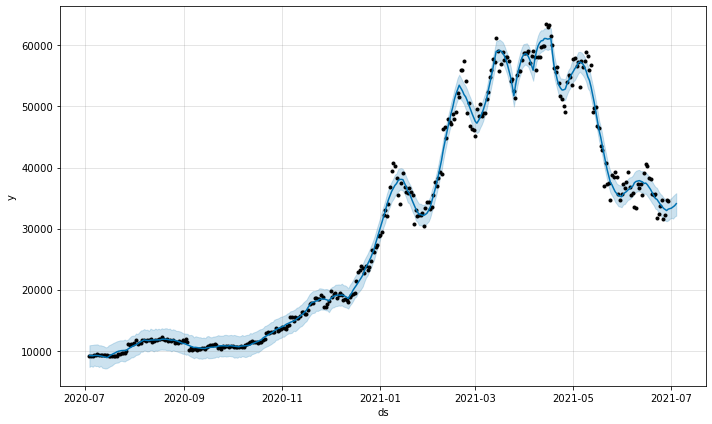

In [123]:
fig1 = prophet.plot(forecast_data)

### 월별, 주별, 일별 추세 시각화

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/opt/anaconda3/lib/python3.8/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/opt/anaconda3/lib/python3.8/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


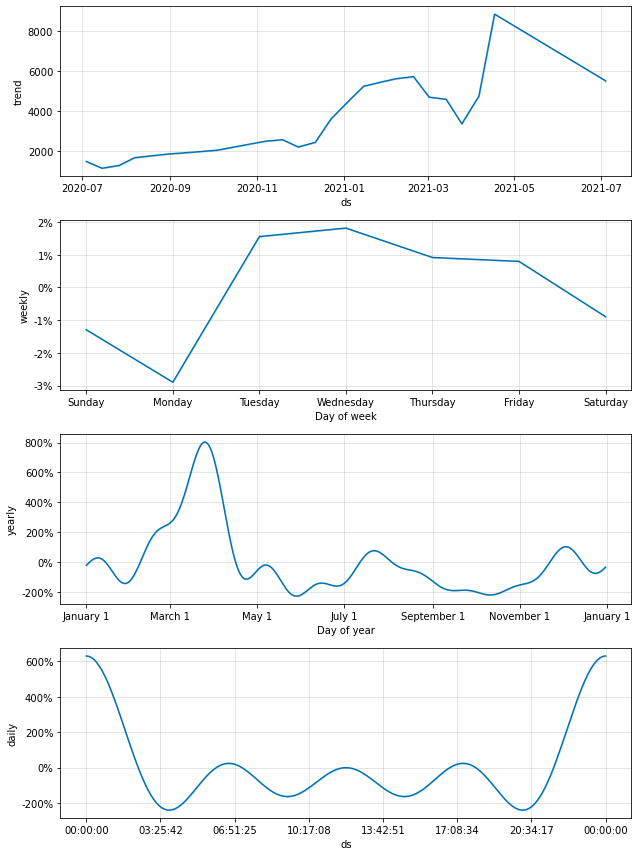

In [124]:
fig2 = prophet.plot_components(forecast_data)

## test 데이터로 5일간 예측치 비교해보기

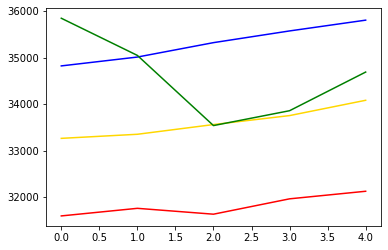

In [125]:
pred_y = forecast_data.yhat.values[-5:] 
test_y = bitcoin_df_test.y.values # test 데이터를 넣음
pred_y_lower = forecast_data.yhat_lower.values[-5:]
pred_y_upper = forecast_data.yhat_upper.values[-5:]

plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.